# ROSE DATASET


In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import calendar
from pylab import rcParams

In [2]:
df = pd.read_csv("Rose.csv", parse_dates=['YearMonth'], index_col='YearMonth')

In [3]:
df.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [4]:
df.dtypes

Rose    float64
dtype: object

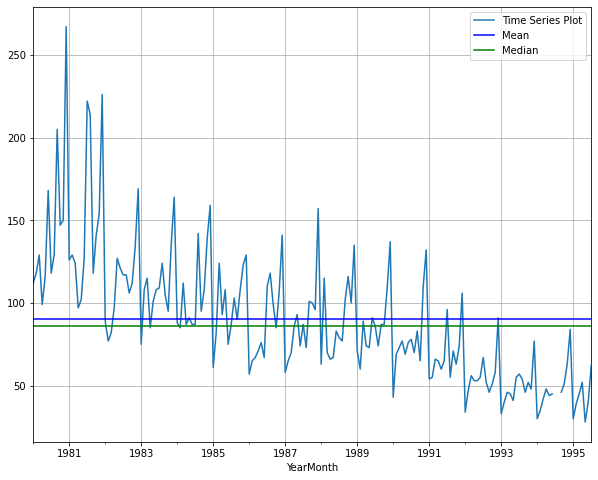

In [5]:

rcParams['figure.figsize'] = 10, 8
df['Rose'].plot()
plt.axhline(df['Rose'].mean(),color='Blue')
plt.axhline(df['Rose'].median(),color='Green')
plt.grid()
plt.legend(['Time Series Plot','Mean','Median']);
plt.show()

In [6]:
df.describe()

,Rose
count,185.000000
mean,90.394595
std,39.175344
min,28.000000
25%,63.000000
50%,86.000000
75%,112.000000
max,267.000000


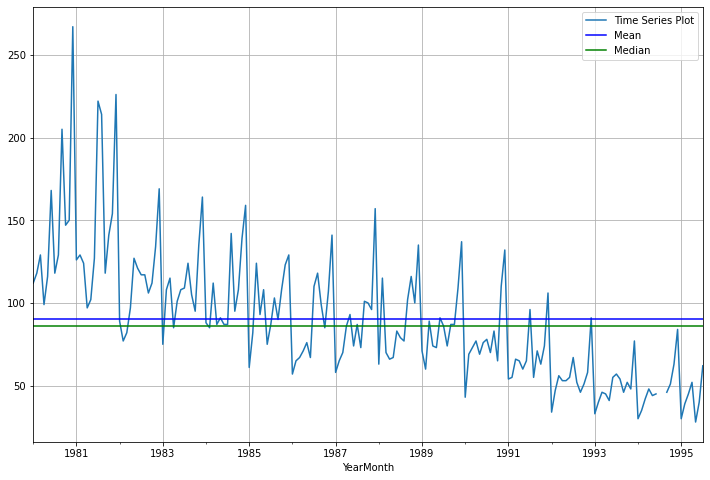

In [7]:

from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
df['Rose'].plot()
plt.axhline(df['Rose'].mean(),color='Blue')
plt.axhline(df['Rose'].median(),color='Green')
plt.grid()
plt.legend(['Time Series Plot','Mean','Median']);
plt.show()

In [8]:
df['Rose'].isnull().sum()

2

In [9]:
df.fillna(method='bfill', inplace = True)
df['Rose'].isnull().sum()

0

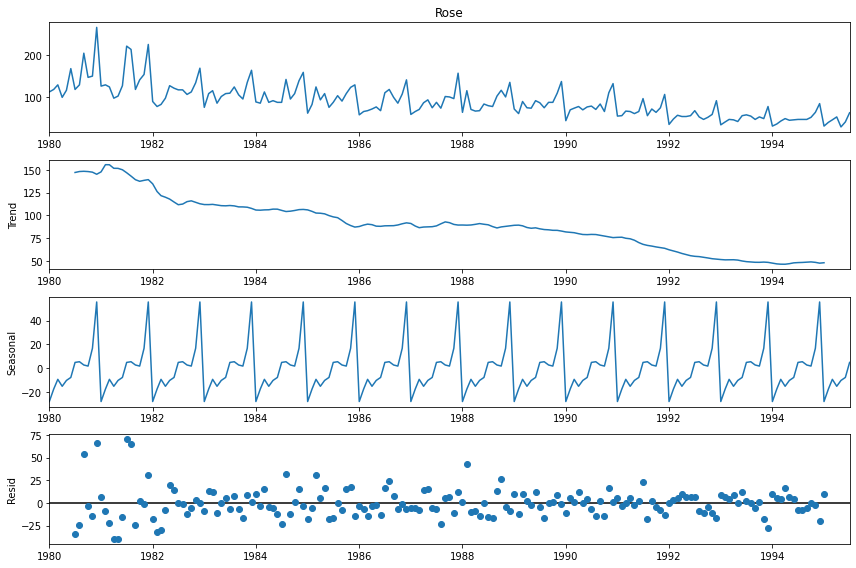

In [10]:

df_add_decompose = seasonal_decompose(df['Rose'],model = 'additive', period=12)
df_add_decompose.plot()
plt.show()

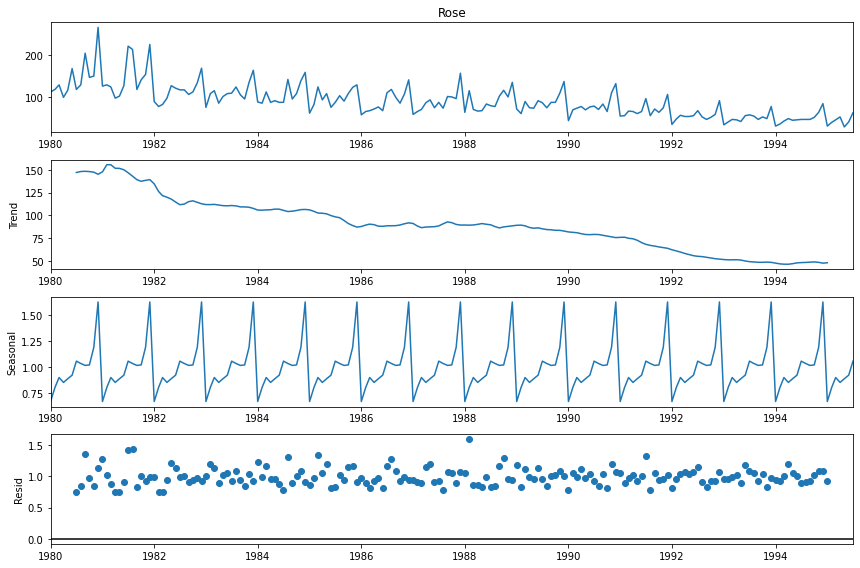

In [11]:

df_multi_decompose = seasonal_decompose(df['Rose'], model='multiplicative', period = 12)
df_multi_decompose.plot()
plt.show()

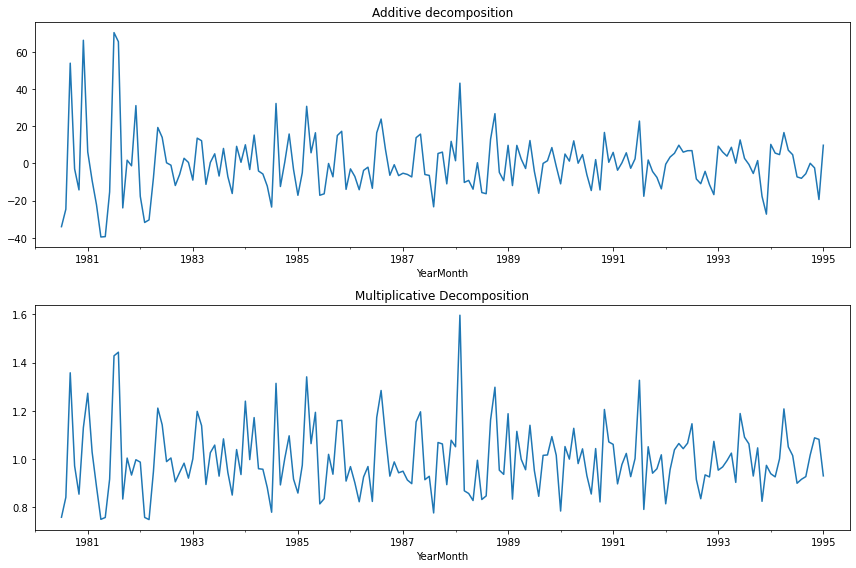

In [12]:

plt.subplot(2,1,1)
plt.title('Additive decomposition')
df_add_decompose.resid.plot()


plt.subplot(2,1,2)
plt.title('Multiplicative Decomposition')
df_multi_decompose.resid.plot()
plt.tight_layout()
plt.show()

In [13]:
df['Month'] = df.index.month
df['Year'] = df.index.year

In [14]:
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])
df.head()

,Rose,Month,Year
YearMonth,,,
1980-01-01,112.0,Jan,1980
1980-02-01,118.0,Feb,1980
1980-03-01,129.0,Mar,1980
1980-04-01,99.0,Apr,1980
1980-05-01,116.0,May,1980


In [15]:
monthly_close_values = monthly_close_values.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_close_values

NameError: name 'monthly_close_values' is not defined

In [ ]:
yearly_closing_price = pd.pivot_table(df, values = "Rose", columns = "Month", index = "Year")
yearly_closing_price = yearly_closing_price[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
yearly_closing_price.plot()

In [ ]:
yearly_closing_price.boxplot();

In [ ]:
monthly_close_values.boxplot()

In [16]:
df.head()

,Rose,Month,Year
YearMonth,,,
1980-01-01,112.0,Jan,1980
1980-02-01,118.0,Feb,1980
1980-03-01,129.0,Mar,1980
1980-04-01,99.0,Apr,1980
1980-05-01,116.0,May,1980


In [17]:

test = df['01-01-1991':]
train = df[:'01-01-1991']

In [18]:
test.head()

,Rose,Month,Year
YearMonth,,,
1991-01-01,54.0,Jan,1991
1991-02-01,55.0,Feb,1991
1991-03-01,66.0,Mar,1991
1991-04-01,65.0,Apr,1991
1991-05-01,60.0,May,1991


In [19]:
print(train.shape)
print(test.shape)

(133, 3)
(55, 3)


In [ ]:
train['Rose'].plot(figsize=(13,5), fontsize=14)
test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [ ]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+134 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

In [ ]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [ ]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time


In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

In [ ]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

In [ ]:
from sklearn import metrics

In [ ]:
rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

In [ ]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [ ]:
SES_train = train.copy()
SES_test = test.copy()

In [ ]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

In [ ]:
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)

In [ ]:
model_SES_autofit.params

In [ ]:
test_predictions_model2 = model_SES_autofit.forecast(steps=len(test))
test_predictions_model2

In [ ]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Rose'],test_predictions_model2,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

In [ ]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model2_test]}
                              ,index=['Alpha=0.0976:SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

In [ ]:
DES_train = train.copy()
DES_test = test.copy()

In [ ]:
model_DES = Holt(SES_train['Rose'])

In [ ]:
model_DES_autofit = model_DES.fit(optimized=True,use_brute=True)

In [ ]:
model_DES_autofit.params_formatted

In [ ]:
test_predictions_model3 = model_DES_autofit.forecast(steps=len(test))
test_predictions_model3

In [ ]:


rmse_model3_test = metrics.mean_squared_error(test['Rose'],test_predictions_model3,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

In [ ]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                              ,index=['Alpha=1.490116e-08,Beta=3.694809e-16:DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

In [ ]:
TES_train = train.copy()
TES_test = test.copy()

In [ ]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='multiplicative',seasonal='multiplicative')

In [ ]:
model_TES_autofit = model_TES.fit(optimized=True,use_brute=True)

In [ ]:
model_TES_autofit.params

In [ ]:
test_predictions_model4 = model_TES_autofit.forecast(steps=len(test))
test_predictions_model4

In [ ]:
rmse_model4_test = metrics.mean_squared_error(test['Rose'],test_predictions_model4,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test))

In [ ]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model4_test]}
                              ,index=['Alpha=0.07575,Beta=0.0541,Gamma=0.4107:TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

In [ ]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [ ]:
train.tail()

In [ ]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

In [ ]:
plt.subplots(figsize=(14,6))

plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [ ]:
rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For Naive Bayes forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

In [ ]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

In [ ]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [ ]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

In [ ]:
plt.subplots(figsize=(12,6))

plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [ ]:
rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

In [ ]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

In [ ]:
MovingAverage = df.copy()
MovingAverage.head()

In [ ]:
MovingAverage['Trailing_3'] = MovingAverage['Rose'].rolling(3).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()
MovingAverage['Trailing_12'] = MovingAverage['Rose'].rolling(12).mean()

MovingAverage.head()


In [ ]:
MovingAverage.shape

In [ ]:
df.shape

In [ ]:

plt.plot(MovingAverage['Trailing_3'], label='3 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'], label='6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.plot(MovingAverage['Trailing_12'],label = '12 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [ ]:

trailing_MovingAverage_train=MovingAverage[0:len(train)] 
trailing_MovingAverage_test=MovingAverage[len(train)-1:]

In [ ]:

fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(10)
fig.set_figheight(5)

axes[0][0].plot(trailing_MovingAverage_train['Rose'], label='Train')
axes[0][0].plot(trailing_MovingAverage_test['Rose'], label='Test')

axes[0][0].plot(trailing_MovingAverage_test['Trailing_3'], label='3 Point Trailing Moving Average on Test Set')
axes[0][0].set_title("3-Months Moving Average")
axes[0][0].legend(loc='best')

axes[0][1].plot(trailing_MovingAverage_train['Rose'], label='Train')
axes[0][1].plot(trailing_MovingAverage_test['Rose'], label='Test')

axes[0][1].plot(trailing_MovingAverage_test['Trailing_6'], label='6 Point Trailing Moving Average on Test Set')
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')

axes[1][0].plot(trailing_MovingAverage_train['Rose'], label='Train')
axes[1][0].plot(trailing_MovingAverage_test['Rose'], label='Test')

axes[1][0].plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
axes[1][0].set_title("9-Months Moving Average")
axes[1][0].legend(loc='best')

axes[1][1].plot(trailing_MovingAverage_train['Rose'], label='Train')
axes[1][1].plot(trailing_MovingAverage_test['Rose'], label='Test')

axes[1][1].plot(trailing_MovingAverage_test['Trailing_12'],label = '12 Point Trailing Moving Average on Test Set')
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')

plt.tight_layout()

In [ ]:
## Test Data - RMSE  - 3 point Trailing MA

rmse_model4_test_3 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_3'],squared=False)
print("For 3 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_3))

## Test Data - RMSE - 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE - 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

## Test Data - RMSE - 12 point Trailing MA

rmse_model4_test_12 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_12'],squared=False)
print("For 12 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_12))

In [ ]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_3,rmse_model4_test_6
                                          ,rmse_model4_test_9,rmse_model4_test_12]}
                           ,index=['3pointTrailingMovingAverage','6pointTrailingMovingAverage'
                                   ,'9pointTrailingMovingAverage','12pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

In [ ]:

plt.subplots(figsize = (14,6))

plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Linear Regression on test data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_3'], label='3 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

In [ ]:
#ARIMA MODEL
import sys
import itertools

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller

import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
dftest = adfuller(df['Rose'])
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(df['Rose'].diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Rose');

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(np.log10(df['Rose']))
plt.xlabel('Years')
plt.ylabel('Rose');

In [ ]:
sales_ts = df['Rose']
plt.figure(figsize=(10, 5))
plt.plot(np.log10(sales_ts).diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Differenced Log (Rose)');


In [ ]:
sales_ts_log = np.log10(sales_ts)
sales_ts_log.dropna(inplace=True)

sales_ts_log_diff = sales_ts_log.diff(periods=1) # same as ts_log_diff = ts_log - ts_log.shift(periods=1)
sales_ts_log_diff.dropna(inplace=True)

In [ ]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(sales_ts_log, lags=30, ax=axes[0])
smt.graphics.plot_pacf(sales_ts_log, lags=30, ax=axes[1])
plt.tight_layout()

In [ ]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
plt.xticks(range(0,30,1), rotation = 90)
smt.graphics.plot_acf(sales_ts_log_diff, lags=30, ax=axes[0])
smt.graphics.plot_pacf(sales_ts_log_diff, lags=30, ax=axes[1])
plt.tight_layout()

In [ ]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [ ]:

df['date'] = df.index
train = df[df.index < '1991-01-01']
test = df[df.index >= '1991-01-01']
train_sales_ts_log = np.log10(train['Rose'])

In [ ]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [ ]:
for param in pdq:#looping through the (p,d,q) values for ARIMA
    for param_seasonal in seasonal_pdq:#looping through the (P,D,Q,freq) values for SARIMA
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(sales_ts_log_diff,#defining the SARIMA model after taking
                                                   # the logarithm of the training data
                                             order = param,#setting the (p,d,q) values
                                             seasonal_order = param_seasonal,#setting the (P,D,Q,freq) values
                                             enforce_stationarity=True)
            results = temp_model.fit()#fitting the above built SARIMA model

            
            if results.aic < best_aic:#defining a conditional statement about whether the AIC of the model
                #just built is less than the best_aic
                best_aic = results.aic#defining the new value of AIC from the SARIMA model as the best_aic
                best_pdq = param#storing the (p,d,q) values in the variable best_pdq
                best_seasonal_pdq = param_seasonal#storing the (P,D,Q,freq) values in the variable 
                #best_seasonal_pdq
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

In [ ]:
best_model = sm.tsa.statespace.SARIMAX(sales_ts_log,
                                      order=(0, 0, 1),
                                      seasonal_order=(1, 0, 1, 12),
                                      enforce_stationarity=True)
best_results = best_model.fit()

In [ ]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

In [ ]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1990-01-01'), dynamic=True, full_results=True)

In [ ]:
pred_dynamic_ci = pred_dynamic.conf_int()

In [ ]:
pred99 = best_results.get_forecast(steps=56,alpha=0.1)

In [ ]:
print(pred99.predicted_mean)

In [ ]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean

#we need to change the scale of the logarithmic scale to the original scale by raising the predicted values
#to the power of 10
testCopy=test.copy()
testCopy['sales_ts_forecasted'] = np.power(10, pred99.predicted_mean)


In [ ]:
testCopy.head()

In [ ]:

mse = ((testCopy['Rose'] - testCopy['sales_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

In [ ]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [round(rmse, 3)]}
                           ,index=['ARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

In [ ]:
plt.plot(testCopy.sales_ts_forecasted)

In [ ]:
axis = train['Rose'].plot(label='Rose', figsize=(10, 6))
testCopy['Rose'].plot(ax=axis, label='Rose', alpha=0.7)
testCopy['sales_ts_forecasted'].plot(ax=axis, label='forecasted', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.show()
plt.close()

In [ ]:
# Get forecast 12 steps (1 years) ahead in future
n_steps = 12
#pred_uc_99 = best_results.get_forecast(steps=12, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=12, alpha=0.05) # alpha=0.05 signifies 95% confidence interval

# Get confidence intervals 95% & 99% of the forecasts
#pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [ ]:
n_steps = 12

idx = pd.date_range(df.index[-1], periods=n_steps, freq='MS')#defining the date range for 3 years
#into the future

fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])#creating a data frame
#by raising the results to the appropriate power for suitable predicted values - For 95% confidence interval

fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                    index=idx, columns=['lower_ci_99', 'upper_ci_99'])#creating a data frame
#by raising the results to the appropriate power for suitable predicted values - For 99% confidence interval

fc_all = fc_95.combine_first(fc_99)

fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95']]# just reordering 
#columns

fc_all.head(12)

In [ ]:
# plot the forecast along with the confidence band

axis = sales_ts.plot(label='Observed', figsize=(8, 4))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.15)
axis.set_xlabel('Years')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.show()

In [ ]:
best_results.plot_diagnostics(lags=30, figsize=(10,8))
plt.show()

# SPARKLING DATASET

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [21]:
#Read the data
df1 = pd.read_csv("Sparkling.csv", parse_dates=['YearMonth'], index_col='YearMonth')

In [22]:
df1.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [23]:
df1.dtypes

Sparkling    int64
dtype: object

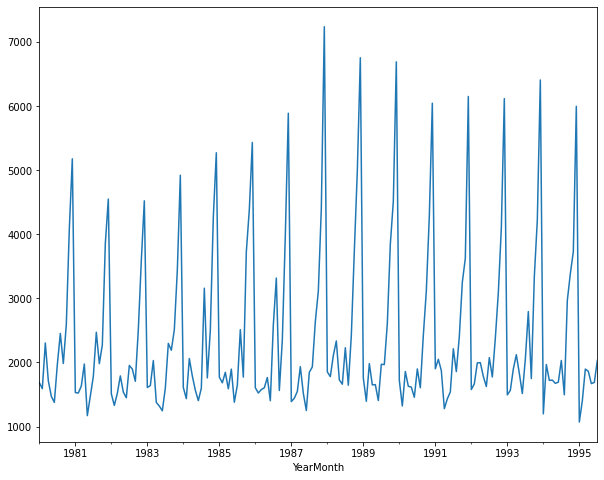

In [24]:
#Increase the figure size
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8
df1['Sparkling'].plot()
plt.show()

In [25]:
df1.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


In [26]:
df1['Sparkling'].isnull().sum()

0

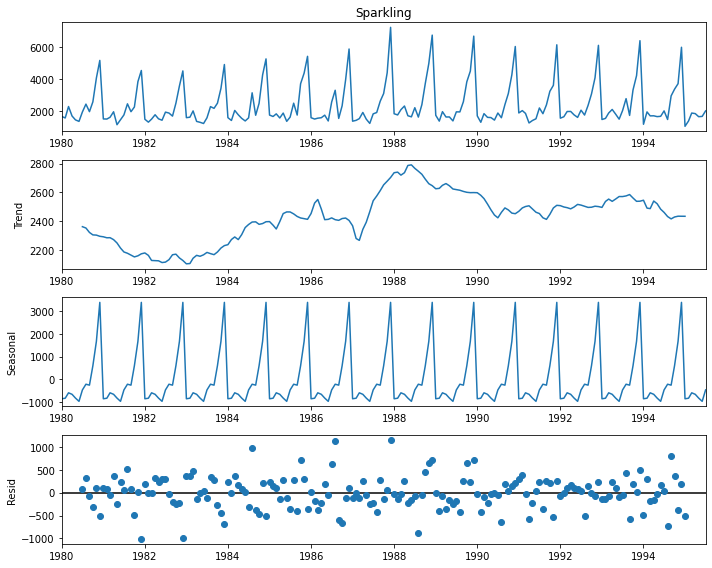

In [27]:
df_add_decompose_spark = seasonal_decompose(df1['Sparkling'],model = 'additive', period=12)
df_add_decompose_spark.plot()
plt.show()

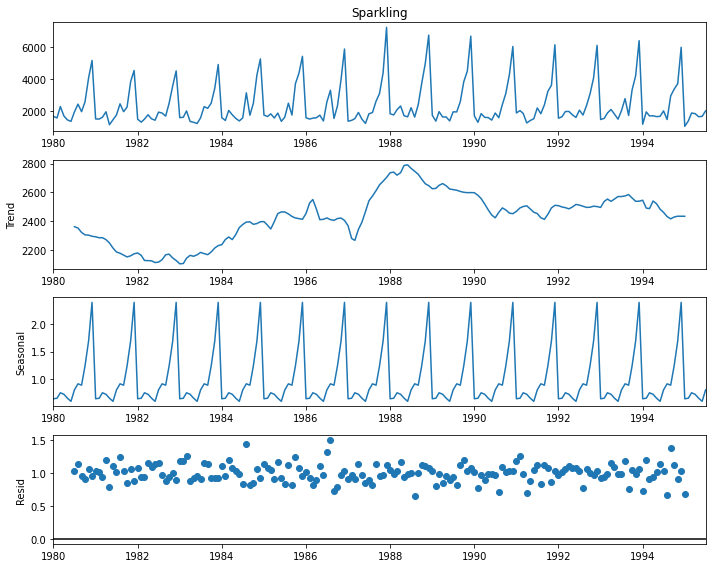

In [28]:
df_multi_decompose_spark = seasonal_decompose(df1['Sparkling'], model='multiplicative', period = 12)
df_multi_decompose_spark.plot()
plt.show()

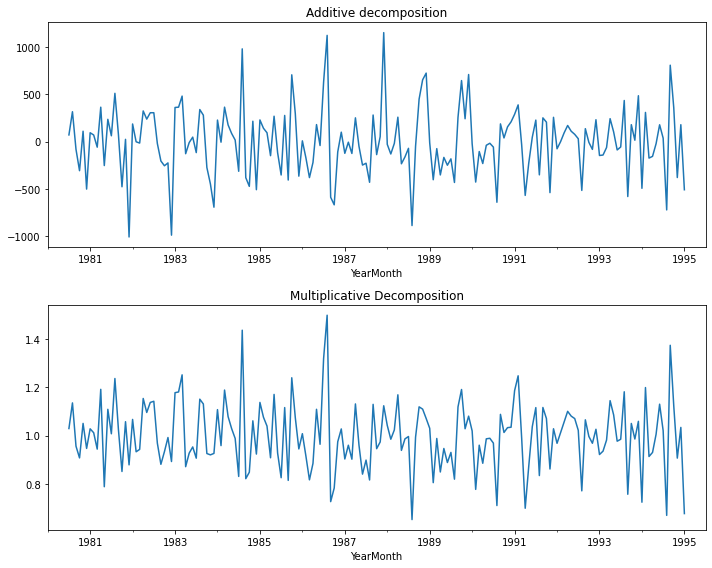

In [29]:
#Checking the residual plots
plt.subplot(2,1,1)
plt.title('Additive decomposition')
df_add_decompose_spark.resid.plot()


plt.subplot(2,1,2)
plt.title('Multiplicative Decomposition')
df_multi_decompose_spark.resid.plot()
plt.tight_layout()
plt.show()

In [30]:

import calendar
df1['Month'] = df.index.month
df1['Year'] = df.index.year


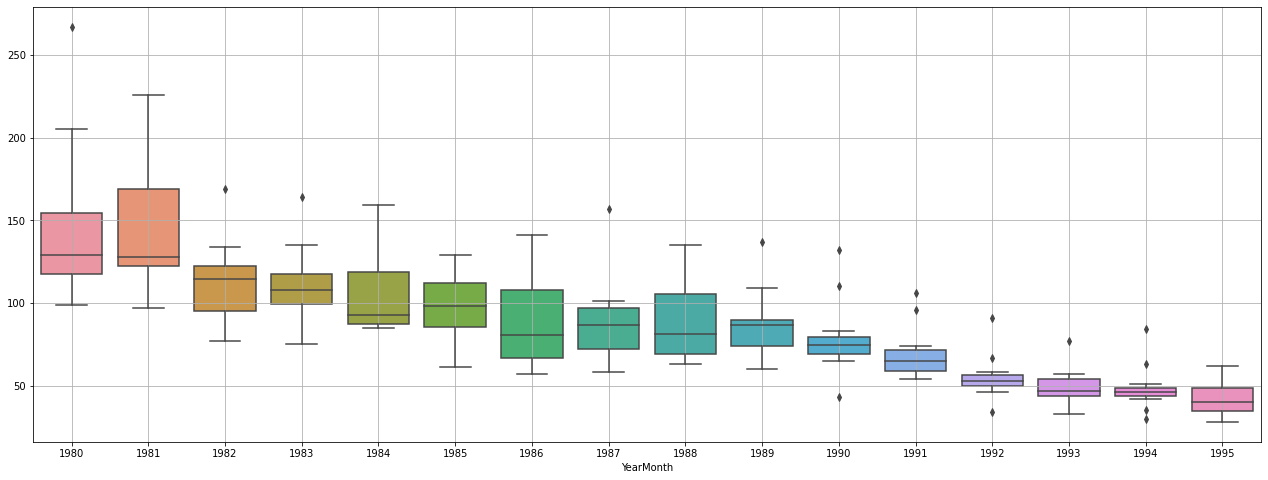

In [31]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df1.index.year,y = df.values[:,0],ax=ax)
plt.grid();

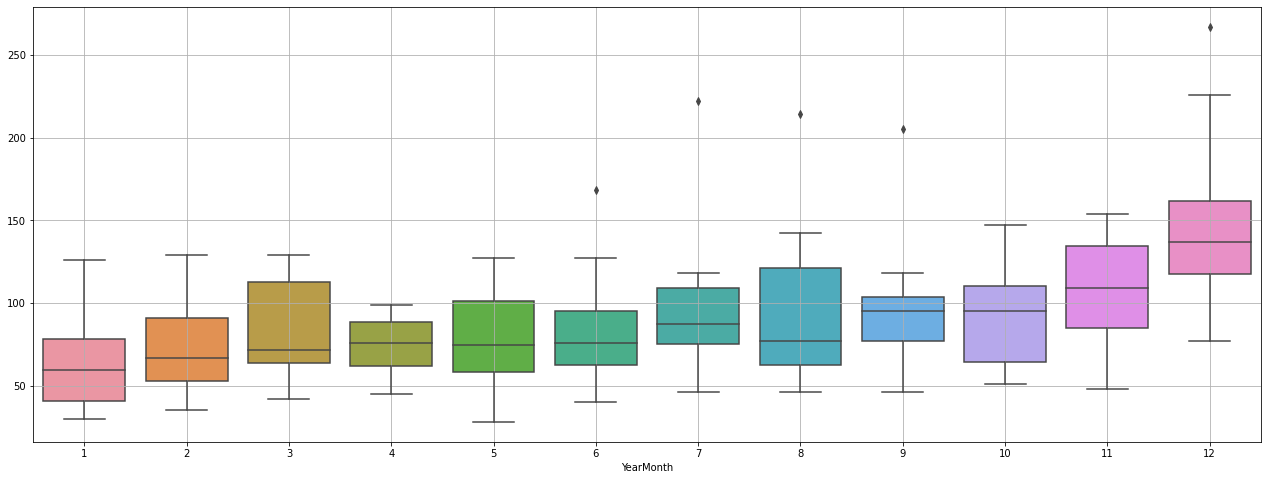

In [32]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df1.index.month,y = df.values[:,0],ax=ax)
plt.grid();

# SPLIT DATA

In [33]:
#Split the data into train and test data
test = df1['01-01-1991':]
train = df1[:'01-01-1991']

In [34]:
print(train.shape)
print(test.shape)

(133, 3)
(55, 3)


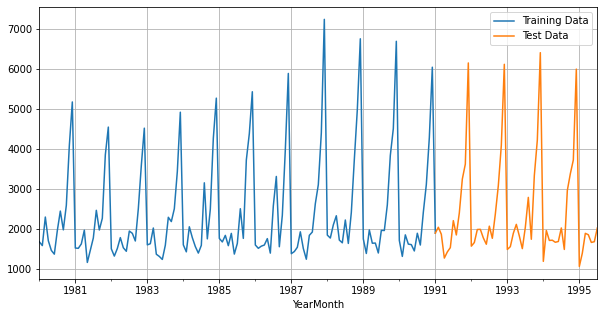

In [35]:
train['Sparkling'].plot(figsize=(10,5), fontsize=10)
test['Sparkling'].plot(figsize=(10,5), fontsize=10)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [36]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+134 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133]
Test Time instance 
 [134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188]


In [37]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [38]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [39]:
lr = LinearRegression()

In [40]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

In [41]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

In [42]:
rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1377.729


In [43]:
resultsDf_Spark = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf_Spark

,Test RMSE
RegressionOnTime,1377.729202


In [54]:
SES_train = train.copy()
SES_test = test.copy()

In [55]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

NameError: name 'SimpleExpSmoothing' is not defined

In [46]:
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)

NameError: name 'model_SES' is not defined

In [47]:
model_SES_autofit.params

NameError: name 'model_SES_autofit' is not defined

In [48]:
test_predictions_model2 = model_SES_autofit.forecast(steps=len(test))
test_predictions_model2

NameError: name 'model_SES_autofit' is not defined

In [49]:
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model2,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

NameError: name 'test_predictions_model2' is not defined

In [50]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model2_test]}
                              ,index=['Alpha=0.0555:SimpleExponentialSmoothing'])

resultsDf_Spark = pd.concat([resultsDf_Spark, temp_resultsDf])
resultsDf_Spark

NameError: name 'rmse_model2_test' is not defined

In [ ]:
DES_train = train.copy()
DES_test = test.copy()

In [ ]:
model_DES = Holt(SES_train['Sparkling'])

In [ ]:
model_DES_autofit = model_DES.fit(optimized=True,use_brute=True)

In [ ]:
model_DES_autofit.params

In [ ]:
test_predictions_model3 = model_DES_autofit.forecast(steps=len(test))
test_predictions_model3

In [ ]:

rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model3,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

In [ ]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                              ,index=['Alpha=0.6178,Beta=0.0001:DoubleExponentialSmoothing'])

resultsDf_Spark = pd.concat([resultsDf_Spark, temp_resultsDf])
resultsDf_Spark

In [ ]:
TES_train = train.copy()
TES_test = test.copy()

In [ ]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='Additive',seasonal='Additive')

In [ ]:
model_TES_autofit = model_TES.fit(optimized=True,use_brute=True)

In [ ]:
model_TES_autofit.params

In [ ]:
test_predictions_model4 = model_TES_autofit.forecast(steps=len(test))
test_predictions_model4

In [ ]:
## Test Data - RMSE

rmse_model4_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model4,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test))

In [ ]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model4_test]}
                              ,index=['Alpha=0.0756,Beta=0.0648,Gamma=0.4790:TripleExponentialSmoothing'])

resultsDf_Spark = pd.concat([resultsDf_Spark, temp_resultsDf])
resultsDf_Spark

In [ ]:
#Naive Model
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [ ]:
train.tail()

In [ ]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

In [ ]:
plt.subplots(figsize=(10,6))

plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [ ]:
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For Naive Bayes forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

In [ ]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf_Spark = pd.concat([resultsDf_Spark, resultsDf_2])
resultsDf_Spark

In [ ]:
#Simple Average
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [ ]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

In [ ]:
plt.subplots(figsize=(10,6))

plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [ ]:
rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

In [ ]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf_Spark = pd.concat([resultsDf_Spark, resultsDf_3])
resultsDf_Spark

In [ ]:
#Moving Average
MovingAverage = df1.copy()
MovingAverage.head()

In [ ]:
MovingAverage['Trailing_3'] = MovingAverage['Sparkling'].rolling(3).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()
MovingAverage['Trailing_12'] = MovingAverage['Sparkling'].rolling(12).mean()

MovingAverage.head(15)

In [ ]:
print(MovingAverage.shape)
print(df1.shape)


In [ ]:
## Plotting on the whole data
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_3'], label='3 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'], label='6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.plot(MovingAverage['Trailing_12'],label = '12 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [ ]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:len(train)] 
trailing_MovingAverage_test=MovingAverage[len(train)-1:]

In [ ]:
## Plotting on both the Training and Test data
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)

axes[0][0].plot(trailing_MovingAverage_train['Sparkling'], label='Train')
axes[0][0].plot(trailing_MovingAverage_test['Sparkling'], label='Test')

axes[0][0].plot(trailing_MovingAverage_test['Trailing_3'], label='3 Point Trailing Moving Average on Test Set')
axes[0][0].set_title("3-Months Moving Average")
axes[0][0].legend(loc='best')

axes[0][1].plot(trailing_MovingAverage_train['Sparkling'], label='Train')
axes[0][1].plot(trailing_MovingAverage_test['Sparkling'], label='Test')

axes[0][1].plot(trailing_MovingAverage_test['Trailing_6'], label='6 Point Trailing Moving Average on Test Set')
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')

axes[1][0].plot(trailing_MovingAverage_train['Sparkling'], label='Train')
axes[1][0].plot(trailing_MovingAverage_test['Sparkling'], label='Test')

axes[1][0].plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
axes[1][0].set_title("9-Months Moving Average")
axes[1][0].legend(loc='best')

axes[1][1].plot(trailing_MovingAverage_train['Sparkling'], label='Train')
axes[1][1].plot(trailing_MovingAverage_test['Sparkling'], label='Test')

axes[1][1].plot(trailing_MovingAverage_test['Trailing_12'],label = '12 Point Trailing Moving Average on Test Set')
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')

plt.tight_layout()

In [ ]:
## Test Data - RMSE  --> 3 point Trailing MA

rmse_model4_test_3 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_3'],squared=False)
print("For 3 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_3))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

## Test Data - RMSE --> 12 point Trailing MA

rmse_model4_test_12 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_12'],squared=False)
print("For 12 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_12))

In [ ]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_3,rmse_model4_test_6
                                          ,rmse_model4_test_9,rmse_model4_test_12]}
                           ,index=['3pointTrailingMovingAverage','6pointTrailingMovingAverage'
                                   ,'9pointTrailingMovingAverage','12pointTrailingMovingAverage'])

resultsDf_Spark = pd.concat([resultsDf_Spark, resultsDf_4])
resultsDf_Spark

In [ ]:

plt.subplots(figsize = (10,6))

plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Linear Regression on test data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_3'], label='3 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## Augmented Dickey Fuller test (ADF Test)

In [ ]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

In [ ]:
test_stationarity(df1['Sparkling'])

In [ ]:
test_stationarity(df1['Sparkling'].diff().dropna())

## Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
# plot_acf(df['RetailSales'],lags=30)
plot_acf(df1['Sparkling'].diff().dropna(),lags=30,title='Differenced Data Autocorrelation')
plt.show()

In [ ]:
# plot_pacf(df['RetailSales'],lags=50)
plot_pacf(df1['Sparkling'].diff().dropna(),lags=30,title='Differenced Data Partial Autocorrelation')
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
plt.xticks(range(0,30,1), rotation = 90)
plot_pacf(df1['Sparkling'].diff().dropna(),lags=30,title='Differenced Data Partial Autocorrelation', ax=axes[1])
plot_acf(df1['Sparkling'].diff().dropna(),lags=30,title='Differenced Data Autocorrelation', ax=axes[0])
plt.tight_layout()

## Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC)

In [ ]:
df1['date'] = df1.index
train = df1[df1.index < '1991-01-01']
test = df1[df1.index >= '1991-01-01']
#train_sales_ts_log = np.log10(train['Sparkling'])

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

In [ ]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

In [ ]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

In [ ]:
auto_ARIMA = ARIMA(train['Sparkling'], order = (2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

In [ ]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [ ]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

In [ ]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [round(rmse,3)]}
                           ,index=['ARIMA'])

resultsDf_Spark = pd.concat([resultsDf_Spark, resultsDf_5])
resultsDf_Spark

## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC). 

In [ ]:
plot_acf(df1['Sparkling'].diff().dropna(),lags=30,title='Differenced Data Autocorrelation')
plt.show()

In [ ]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

In [ ]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

In [ ]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

In [ ]:
SARIMA_AIC.sort_values(by=['AIC']).head()

In [ ]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

## Predict on the Test Set using this model and evaluate the model.

In [ ]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [ ]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

In [ ]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

In [ ]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [round(rmse,3)]}
                           ,index=['ARIMA'])


resultsDf_Spark = pd.concat([resultsDf_Spark,temp_resultsDf])

resultsDf_Spark


In [ ]:
# Define the p, d and q parameters to take any value between 0 and 2
p = q = range(0, 2)
d = range(1,2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [ ]:
#Separate data into train and test
df1['date'] = df1.index
train = df1[df1.index < '1991-01-01']
test = df1[df1.index >= '1991-01-01']
train_sales_ts_log = np.log10(train['Sparkling'])

In [ ]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [ ]:
for param in pdq:#looping through the (p,d,q) values for ARIMA
    for param_seasonal in seasonal_pdq:#looping through the (P,D,Q,freq) values for SARIMA
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(sales_ts_log_diff,#defining the SARIMA model after taking
                                                   # the logarithm of the training data
                                             order = param,#setting the (p,d,q) values
                                             seasonal_order = param_seasonal,#setting the (P,D,Q,freq) values
                                             enforce_stationarity=True)
            results = temp_model.fit()#fitting the above built SARIMA model

            
            if results.aic < best_aic:#defining a conditional statement about whether the AIC of the model
                #just built is less than the best_aic
                best_aic = results.aic#defining the new value of AIC from the SARIMA model as the best_aic
                best_pdq = param#storing the (p,d,q) values in the variable best_pdq
                best_seasonal_pdq = param_seasonal#storing the (P,D,Q,freq) values in the variable 
                #best_seasonal_pdq
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

In [ ]:
best_model = sm.tsa.statespace.SARIMAX(sales_ts_log,
                                      order=(0, 0, 1),
                                      seasonal_order=(1, 0, 1, 12),
                                      enforce_stationarity=True)
best_results = best_model.fit()

In [ ]:
pred99=best_results.get_prediction(steps=56,alpha=0.05)
print(pred99.predicted_mean)

In [ ]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

In [ ]:
#pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1990-01-01'), dynamic=True, full_results=True)
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1990-01-01'), dynamic=True, full_results=True)

In [ ]:
pred_dynamic_ci = pred_dynamic.conf_int()

In [ ]:
pred99 = best_results.get_prediction(steps=56,alpha=0.05)

In [ ]:
print(pred99.predicted_mean)

In [ ]:
testCopy.head()

In [ ]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy=test.copy()
#we need to change the scale of the logarithmic scale to the original scale by raising the predicted values
#to the power of 10
testCopy['sales_ts_forecasted'] = np.power(10, pred99.predicted_mean)

In [ ]:

mse = ((testCopy['Sparkling'] - testCopy['sales_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

In [ ]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [round(rmse, 3)]}
                           ,index=['ARIMA'])

resultsDf_Spark = pd.concat([resultsDf_Spark, resultsDf_5])
resultsDf_Spark

In [ ]:
plt.plot(testCopy.sales_ts_forecasted)

In [ ]:
axis = train['Sparkling'].plot(label='Sparkling', figsize=(10, 6))
testCopy['Sparkling'].plot(ax=axis, label='Sparkling', alpha=0.7)
testCopy['sales_ts_forecasted'].plot(ax=axis, label='forecasted', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Sparklings')
plt.legend(loc='best')
plt.show()
plt.close()

In [ ]:
# Get forecast 12 steps (1 years) ahead in future
n_steps = 12
pred_uc_99 = best_results.get_forecast(steps=12, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=12, alpha=0.05) # alpha=0.05 signifies 95% confidence interval

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [ ]:
n_steps = 12

idx = pd.date_range(df1.index[-1], periods=n_steps, freq='MS')#defining the date range for 3 years
#into the future

fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])#creating a data frame
#by raising the results to the appropriate power for suitable predicted values - For 95% confidence interval

fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])#creating a data frame
#by raising the results to the appropriate power for suitable predicted values - For 99% confidence interval

fc_all = fc_95.combine_first(fc_99)

fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']]# just reordering 
#columns

fc_all.head()

In [ ]:
# plot the forecast along with the confidence band

axis = sales_ts.plot(label='Observed', figsize=(8, 4))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.15)
axis.set_xlabel('Years')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()

In [ ]:
best_results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()

# END